In [2]:
# scientific computing
import numpy as np

# data analysis and manipulation tool
import pandas as pd 

# the basis for plotting
import matplotlib.pyplot as plt
# plotting
import seaborn as sns

# loading the dataset 


With `pandas`, it is easy to load data of different formats (e.g., .csv, .xlsx, .txt, etc.). The important thing to know is delimeters, or separators. Usually, they are detected automatically but, in some cases, you need to specify them yourselves. For example, to load data saved as a plain text, you will need something like `pd.read_csv('file.txt', sep = "\t")`. 

Now we have a simple .csv file which can be loaded by using `read_csv` function directly.

Link to the dataset: https://www.sheffield.ac.uk/polopoly_fs/1.937195!/file/Diet_R.csv  
Summary: information about 78 people using one of three diets

In [4]:
df_diet = pd.read_csv("Diet_R.csv")

To briefly examine the dataset, we can use different methods. For example, we can just call the dataset by printing `df_diet`. Jupyter Notebook gives a nice summary by showing several formatted first and last rows.

In [5]:
df_diet

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


Also, we can call `print(df_diet)` to have an unformatted variant of the table above. Finally, it can be useful to see first and last rows separately with functions `df_diet.head()` and `df_diet.tail()`. By defauly, it returns 5 rows but you can specify the needed amount (e.g., `df_diet.head(10)`).

# data manipulation 

First of all, it is possible to do simple calculations with columns. For example, we can look at the change it weights of participants and save it as a new column.

In [6]:
df_diet['weight.delta'] = df_diet['pre.weight'] - df_diet['weight6weeks']
df_diet

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight.delta
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,2.8
74,75,1,49,177,84,3,79.9,4.1
75,76,1,28,164,85,3,79.7,5.3
76,77,1,40,167,87,3,77.8,9.2


But sometimes more complicated operations are required. For example, we can see summary statistics for people taking different diets. To do this, we can use `groupby` function from `pandas`.

In [7]:
df_diet.groupby(by='Diet', as_index=False).mean()

,Diet,Person,Age,Height,pre.weight,weight6weeks,weight.delta
0,1,12.5,40.875000,170.291667,72.875000,69.575000,3.300000
1,2,38.0,39.000000,174.851852,71.111111,68.085185,3.025926
2,3,65.0,37.777778,167.259259,73.629630,68.481481,5.148148


So, we can see that the 3rd diet was the most effective as it had the heighest `weight.delta` value.

### task:
> How the code above should be edited to see the summary statics for both diet and gender simulteneously?   
> Which gender performed better? Using what diet?

But it is also possible to avoid such construction with the loop.

In [39]:
grouped_diet = df_diet.groupby('Diet')
diet_columns = df_diet.Diet.unique()

diet_data = {}

for group in diet_columns:
    diet_data[group] = grouped_diet.get_group(group)['weight.delta'].agg(lambda x: x.tolist())
    
print (diet_data)
    
df_box_diet = pd.DataFrame.from_dict(diet_data, orient='index')

{2: [0.0, 0.0, -2.1000000000000014, 2.0, 1.7000000000000028, 4.299999999999997, 7.0, 0.6000000000000014, 2.700000000000003, 3.6000000000000014, 3.0, 2.0, 4.200000000000003, 4.700000000000003, 3.299999999999997, -0.5, 4.200000000000003, 2.4000000000000057, 5.799999999999997, 3.5, 5.299999999999997, 1.7000000000000028, 5.400000000000006, 6.099999999999994, 7.900000000000006, -1.4000000000000057, 4.299999999999997], 1: [3.799999999999997, 6.0, 0.7000000000000028, 2.8999999999999986, 2.799999999999997, 2.0, 2.0, 8.5, 1.9000000000000057, 3.0999999999999943, 1.5, 3.0, 3.5999999999999943, 0.9000000000000057, -0.5999999999999943, 1.0999999999999943, 4.5, 4.099999999999994, 9.0, 2.4000000000000057, 3.9000000000000057, 3.5, 5.099999999999994, 3.5], 3: [7.0, 5.600000000000001, 3.3999999999999986, 6.799999999999997, 7.799999999999997, 5.399999999999999, 6.799999999999997, 7.200000000000003, 7.0, 7.299999999999997, 0.9000000000000057, 7.599999999999994, 4.099999999999994, 6.299999999999997, 5.0, 2.

More info on `pandas`: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

# plot with matplotlib

Even though it is possible to show the important information using the text only, it could be better to use graphical representation as it is easier to read. Still, it is crucial to guide readers through the information to avoid misunderstandings. For example, you need to use the correct type of plot for the particular (e.g., the distribution is shown with histogram).   

`matplotlib` can help with basic plotting.

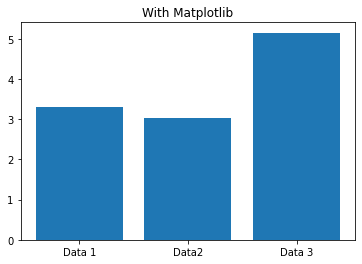

In [14]:
fig, ax = plt.subplots()
data_id = ['Data 1', 'Data2', 'Data 3']
means = [np.mean(df_diet[df_diet['Diet']==1]['weight.delta']), np.mean(df_diet[df_diet['Diet']==2]['weight.delta']), np.mean(df_diet[df_diet['Diet']==3]['weight.delta'])]
ax.bar(data_id, means)
plt.title("With Matplotlib")
plt.show()

# basics of plotting with seaborn

`seaborn` is a Python data visualization library based on `matplotlib` which benefits are simplicity and attractiveness.   

However, when you do plots, it is remember to choose the right type.

## bar plot

If you need to compare compare values of discrete categories, you can choose *bar plot*. 

Lets see how many participants followed each data:

<AxesSubplot:xlabel='Diet', ylabel='Person'>

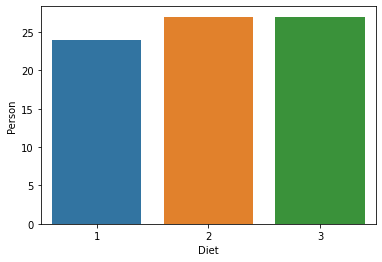

In [27]:
diet_count = df_diet.groupby(by='Diet', as_index=False).count()
sns.barplot(x=diet_count['Diet'], y=diet_count['Person'])

By the plot above, we can say that there was roughly equal amount of participants trying different diets. But what if we include the gender?

<AxesSubplot:xlabel='Diet', ylabel='Person'>

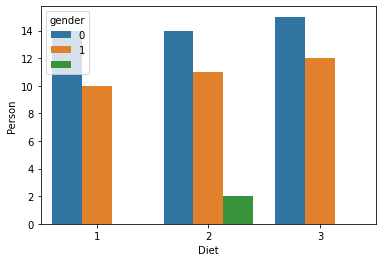

In [28]:
diet_gender = df_diet.groupby(by=['Diet', 'gender'], as_index=False).count()
sns.barplot(x=diet_gender['Diet'], y=diet_gender['Person'], hue=diet_gender['gender'])

Now we can see, that there were always more participants of gender 0. Besides, several participants didn't specify their gender. 

To make this plot even better, we can add title, change colours of bars and borders. For example: 

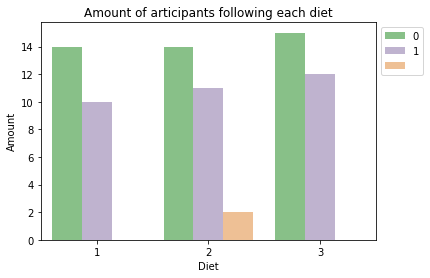

In [53]:
sns.barplot(x=diet_gender['Diet'], y=diet_gender['Person'], hue=diet_gender['gender'], palette='Accent').set(title='Amount of articipants following each diet', ylabel='Amount')
plt.legend(loc = 2, bbox_to_anchor = (1,1))

Now, the label for y-axis is more informative, and the legend is located outside the main box. If we had a background information, we could add it to the axis (e.g., to decode what gender 0 and 1 means). 

## box plot

The more complete picture you can get with *box plot*...

<AxesSubplot:xlabel='Diet', ylabel='weight.delta'>

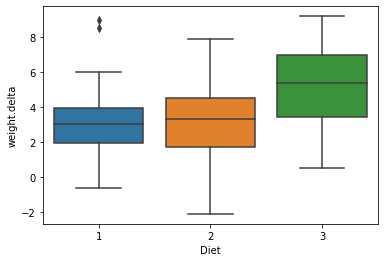

In [21]:
sns.boxplot(x=df_diet['Diet'], y=df_diet['weight.delta'])

## violin plot

... or the *violin plot*.

<AxesSubplot:xlabel='Diet', ylabel='weight.delta'>

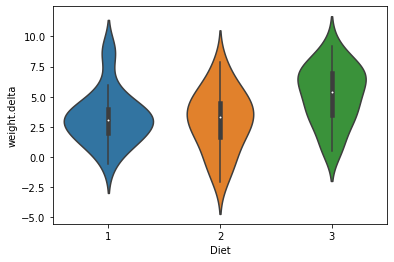

In [30]:
sns.violinplot(x=df_diet['Diet'], y=df_diet['weight.delta'])

## histogram

If you want to look at the distribution of a continious variable, you should choose *histogram*.

<AxesSubplot:xlabel='weight.delta', ylabel='Count'>

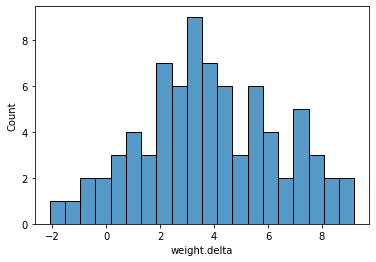

In [29]:
sns.histplot(x=df_diet['weight.delta'], bins=20)

## scatter plot

When you want to look at the relationships between two continious variables, you choose *scatter plot*. 

<AxesSubplot:xlabel='Height', ylabel='weight.delta'>

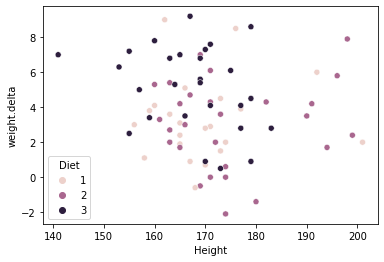

In [37]:
sns.scatterplot(x=df_diet['Height'], y=df_diet['weight.delta'], hue=df_diet['Diet'])

## line plot

With *line plots*, it is possible to look at the change of variable over time.

<AxesSubplot:xlabel='year', ylabel='passengers'>

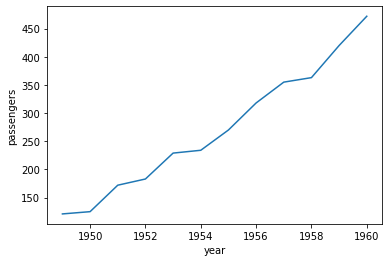

In [38]:
flights = sns.load_dataset("flights")
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

More info about visualisation in general: https://towardsdatascience.com/data-visualization-101-how-to-choose-a-chart-type-9b8830e558d6  
More info on `seaborn`: https://seaborn.pydata.org

# generating the data

However, in some cases, instead of loading the data, we generate it. In this case, `numpy` which is one of the most basic libraries would be a great help. Lets start with generating two different datasets. To do this, we will randomly sample a Beta distribution with `np.random.beta()`. It requires 3 arguments: $\alpha$, $\beta$, and *size*. Both $\alpha$, $\beta$ should be positive. 

In [56]:
# data set 1
a, b = 2, 5
n = 100
np.random.seed(123)
data1 = np.random.beta(a, b, size=n)
print("data1 (3 first values):", data1[:3])

# data set 2
a, b = 10, 5
n = 100
np.random.seed(123)
data2 = np.random.beta(a, b, size=n)
print("data2 (3 first values):", data2[:3])

data1 (3 first values): [0.079743   0.1001085  0.02233009]
data2 (3 first values): [0.48190481 0.46384746 0.50741647]


More info about random sampling: https://numpy.org/doc/stable/reference/random/index.html

# calculations

With `numpy`, it is easy to do calculations. For example, we can check the mean values of generated data sets...

In [61]:
print("Mean of the first data set is", np.mean(data1))
print("Mean of the second data set is", np.mean(data2))

Mean of the first data set is 0.2682906798384101 .
Mean of the second data set is 0.6669931458932479 .


... or median

In [62]:
print("Median of the first data set is", np.median(data1))
print("Median of the second data set is", np.median(data2))

Median of the first data set is 0.2331604892780911
Median of the second data set is 0.685457834734287


We can do the same with the previously loaded data about diets:

In [67]:
print("Mean age of participants is", round(np.mean(df_diet['Age']), 2))

Mean age of participants is 39.15


More info on `matplotlib`: https://matplotlib.org

# convert numpy data to pandas

It is also possible to convert generated with `numpy` data into `pandas` format in order to perform manipulations.

In [68]:
data = {'data1': data1, 'data2': data2}
df = pd.DataFrame(data)
df

,data1,data2
0,0.079743,0.481905
1,0.100109,0.463847
2,0.022330,0.507416
3,0.173128,0.633137
4,0.233838,0.687842
...,...,...
95,0.230918,0.718957
96,0.121328,0.784875
97,0.062475,0.746238
98,0.160504,0.820212
